In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline
import fbprophet
from fbprophet import Prophet
sns.set()

In [22]:
fbprophet.__version__

'0.7.1'

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip /content/gdrive/MyDrive/household_power_consumption.zip   -d /content/gdrive/MyDrive/Project/data

Archive:  /content/gdrive/MyDrive/household_power_consumption.zip
  inflating: /content/gdrive/MyDrive/Project/data/household_power_consumption.txt  


In [24]:
df = pd.read_csv("/content/gdrive/MyDrive/Project/data/household_power_consumption.csv", sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.



In [26]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [27]:
df_temp = df.copy()

In [28]:
df_quarterly = df_temp.resample('D').mean()

TypeError: ignored

In [29]:
df_temp = df.copy()

In [30]:
df_temp.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [31]:
df.Date.describe()

count        2075259
unique          1442
top       10/11/2010
freq            1440
Name: Date, dtype: object

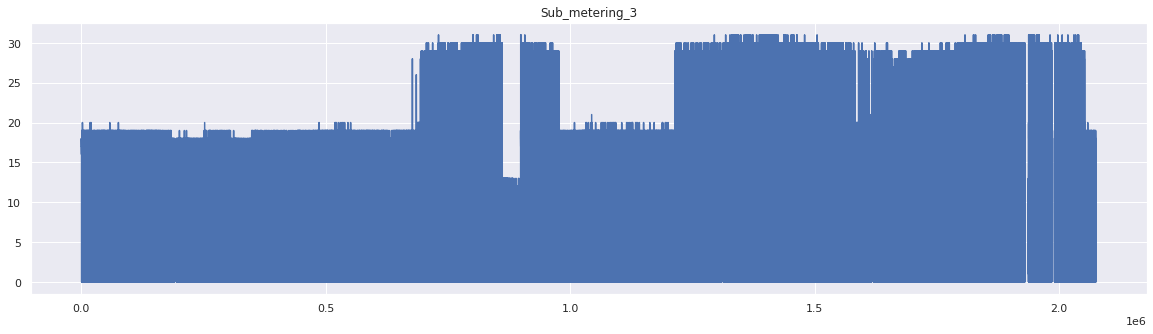

In [32]:
df_temp.Sub_metering_3.plot(figsize=(20,5), title='Sub_metering_3')
plt.show()

In [33]:
df_temp.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [34]:
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

In [35]:
df_temp.Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                 2075259
unique                   1442
top       2010-09-23 00:00:00
freq                     1440
first     2006-12-16 00:00:00
last      2010-12-11 00:00:00
Name: Date, dtype: object

In [39]:
df_temp.set_index('Date',inplace=True)

In [41]:
df_daily = df_temp.resample('D').mean()

In [36]:
df_temp.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [14]:
del df_temp['Time'], df_temp['Global_active_power'], df_temp['Global_reactive_power'], df_temp['Voltage'], df_temp['Global_intensity'], df_temp['Sub_metering_1'], df_temp['Sub_metering_2']

In [15]:
df_temp['ds'] = df_temp['Date']
df_temp['y'] = df_temp['Sub_metering_3']
df_temp.head()

,Date,Sub_metering_3,ds,y
0,2006-12-16,17.0,2006-12-16,17.0
1,2006-12-16,16.0,2006-12-16,16.0
2,2006-12-16,17.0,2006-12-16,17.0
3,2006-12-16,17.0,2006-12-16,17.0
4,2006-12-16,17.0,2006-12-16,17.0


In [16]:
del df_temp['Date'], df_temp['Sub_metering_3']

In [17]:
df_temp.head()

,ds,y
0,2006-12-16,17.0
1,2006-12-16,16.0
2,2006-12-16,17.0
3,2006-12-16,17.0
4,2006-12-16,17.0


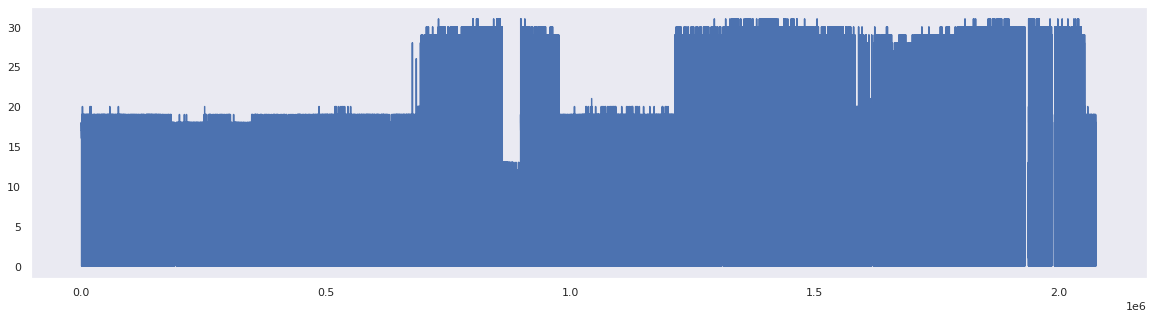

In [18]:
df_temp['y'].plot(figsize=(20,5))
plt.grid()
plt.show()

In [19]:
model = Prophet()

In [ ]:
model.fit(df_temp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
# define the period for which we want a prediction
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)
forecast.head()

Exception: ignored

In [ ]:
forecast[['ds','yhat', 'yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,7.515699,-3.516478,17.822236,6.054862,6.054862,6.054862
1,2006-12-17,6.586967,-3.888173,17.035800,6.045212,6.045212,6.045212
2,2006-12-18,6.877930,-3.394192,16.633974,6.035563,6.035563,6.035563
3,2006-12-19,6.950477,-3.675133,17.892700,6.025914,6.025914,6.025914
4,2006-12-20,6.972932,-4.099174,17.665586,6.016265,6.016265,6.016265
...,...,...,...,...,...,...,...
1447,2015-12-31,-4.547600,-172.645277,143.790690,-5.464990,-176.240272,140.068051
1448,2016-12-31,-6.148133,-223.445629,188.811850,-7.772814,-228.336425,187.495735
1449,2017-12-31,-9.364539,-283.317127,247.244352,-10.074334,-282.370189,248.463321
1450,2018-12-31,-11.365730,-339.943463,293.108701,-12.375853,-338.755868,294.131551


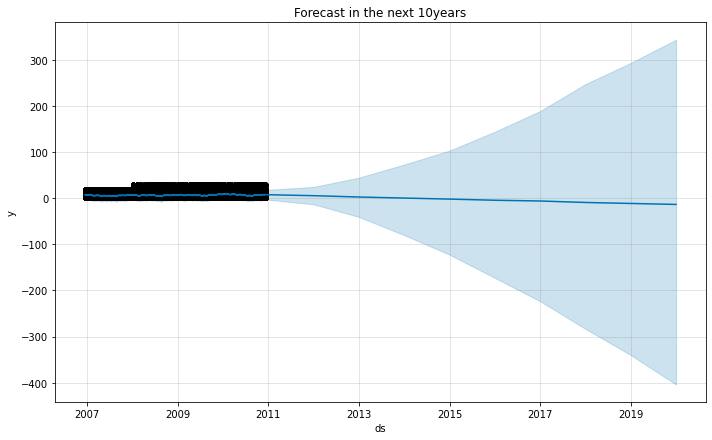

In [ ]:
model.plot(forecast)
plt.title('Forecast in the next 10years')
plt.show()

In [ ]:
future_2 = model.make_future_dataframe(periods=10, freq='M')
forecast_2 = model.predict(future_2)
forecast_2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,6.054862,-2.589113,18.029151,6.054862,6.054862,1.460837,1.460837,1.460837,0.497674,0.497674,0.497674,0.963163,0.963163,0.963163,0.0,0.0,0.0,7.515699
1,2006-12-17,6.045212,-4.576566,17.345713,6.045212,6.045212,0.541754,0.541754,0.541754,-0.412923,-0.412923,-0.412923,0.954678,0.954678,0.954678,0.0,0.0,0.0,6.586967
2,2006-12-18,6.035563,-4.047286,17.637280,6.035563,6.035563,0.842367,0.842367,0.842367,-0.108301,-0.108301,-0.108301,0.950668,0.950668,0.950668,0.0,0.0,0.0,6.877930
3,2006-12-19,6.025914,-2.997785,17.916055,6.025914,6.025914,0.924563,0.924563,0.924563,-0.026279,-0.026279,-0.026279,0.950841,0.950841,0.950841,0.0,0.0,0.0,6.950477
4,2006-12-20,6.016265,-3.971312,18.395598,6.016265,6.016265,0.956667,0.956667,0.956667,0.001853,0.001853,0.001853,0.954814,0.954814,0.954814,0.0,0.0,0.0,6.972932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2011-05-31,5.096777,-6.616558,16.071040,1.241502,9.231330,-0.522571,-0.522571,-0.522571,-0.026279,-0.026279,-0.026279,-0.496292,-0.496292,-0.496292,0.0,0.0,0.0,4.574206
1448,2011-06-30,4.907611,-8.259772,15.892019,-0.161166,10.324450,-0.718079,-0.718079,-0.718079,-0.196735,-0.196735,-0.196735,-0.521344,-0.521344,-0.521344,0.0,0.0,0.0,4.189532
1449,2011-07-31,4.712139,-9.836907,14.759104,-1.644075,11.379788,-1.749481,-1.749481,-1.749481,-0.412923,-0.412923,-0.412923,-1.336557,-1.336557,-1.336557,0.0,0.0,0.0,2.962659
1450,2011-08-31,4.516668,-10.290308,16.307357,-3.069783,12.589423,-1.667686,-1.667686,-1.667686,0.001853,0.001853,0.001853,-1.669539,-1.669539,-1.669539,0.0,0.0,0.0,2.848982


In [ ]:
forecast_2[['ds','yhat','yhat_lower','yhat_upper','trend_lower','trend_upper']]
forecast_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,6.054862,-2.589113,18.029151,6.054862,6.054862,1.460837,1.460837,1.460837,0.497674,0.497674,0.497674,0.963163,0.963163,0.963163,0.0,0.0,0.0,7.515699
1,2006-12-17,6.045212,-4.576566,17.345713,6.045212,6.045212,0.541754,0.541754,0.541754,-0.412923,-0.412923,-0.412923,0.954678,0.954678,0.954678,0.0,0.0,0.0,6.586967
2,2006-12-18,6.035563,-4.047286,17.637280,6.035563,6.035563,0.842367,0.842367,0.842367,-0.108301,-0.108301,-0.108301,0.950668,0.950668,0.950668,0.0,0.0,0.0,6.877930
3,2006-12-19,6.025914,-2.997785,17.916055,6.025914,6.025914,0.924563,0.924563,0.924563,-0.026279,-0.026279,-0.026279,0.950841,0.950841,0.950841,0.0,0.0,0.0,6.950477
4,2006-12-20,6.016265,-3.971312,18.395598,6.016265,6.016265,0.956667,0.956667,0.956667,0.001853,0.001853,0.001853,0.954814,0.954814,0.954814,0.0,0.0,0.0,6.972932


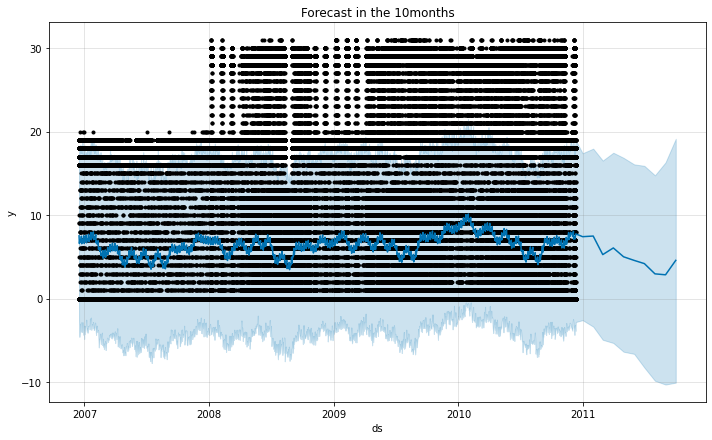

In [ ]:
model.plot(forecast_2)
plt.title('Forecast in the 10months')
plt.show()

In [ ]:
future_3 = model.make_future_dataframe(periods=10, freq='D')
forecast_3 = model.predict(future_3)
forecast_3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,6.054862,-3.194407,19.092301,6.054862,6.054862,1.460837,1.460837,1.460837,0.497674,0.497674,0.497674,0.963163,0.963163,0.963163,0.0,0.0,0.0,7.515699
1,2006-12-17,6.045212,-4.419271,16.918884,6.045212,6.045212,0.541754,0.541754,0.541754,-0.412923,-0.412923,-0.412923,0.954678,0.954678,0.954678,0.0,0.0,0.0,6.586967
2,2006-12-18,6.035563,-3.272245,17.523118,6.035563,6.035563,0.842367,0.842367,0.842367,-0.108301,-0.108301,-0.108301,0.950668,0.950668,0.950668,0.0,0.0,0.0,6.877930
3,2006-12-19,6.025914,-3.343382,17.873542,6.025914,6.025914,0.924563,0.924563,0.924563,-0.026279,-0.026279,-0.026279,0.950841,0.950841,0.950841,0.0,0.0,0.0,6.950477
4,2006-12-20,6.016265,-4.320996,17.810647,6.016265,6.016265,0.956667,0.956667,0.956667,0.001853,0.001853,0.001853,0.954814,0.954814,0.954814,0.0,0.0,0.0,6.972932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2010-12-17,6.137190,-3.160584,17.975418,6.137190,6.137190,1.199388,1.199388,1.199388,0.244711,0.244711,0.244711,0.954678,0.954678,0.954678,0.0,0.0,0.0,7.336578
1448,2010-12-18,6.130884,-3.320713,18.246755,6.130884,6.130884,1.448342,1.448342,1.448342,0.497674,0.497674,0.497674,0.950668,0.950668,0.950668,0.0,0.0,0.0,7.579227
1449,2010-12-19,6.124579,-3.528218,17.571192,6.124579,6.124579,0.537918,0.537918,0.537918,-0.412923,-0.412923,-0.412923,0.950841,0.950841,0.950841,0.0,0.0,0.0,6.662496
1450,2010-12-20,6.118273,-3.986151,18.854045,6.118273,6.118273,0.846513,0.846513,0.846513,-0.108301,-0.108301,-0.108301,0.954814,0.954814,0.954814,0.0,0.0,0.0,6.964786


In [ ]:
forecast_3[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]
forecast_3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,6.054862,-3.194407,19.092301,6.054862,6.054862,1.460837,1.460837,1.460837,0.497674,0.497674,0.497674,0.963163,0.963163,0.963163,0.0,0.0,0.0,7.515699
1,2006-12-17,6.045212,-4.419271,16.918884,6.045212,6.045212,0.541754,0.541754,0.541754,-0.412923,-0.412923,-0.412923,0.954678,0.954678,0.954678,0.0,0.0,0.0,6.586967
2,2006-12-18,6.035563,-3.272245,17.523118,6.035563,6.035563,0.842367,0.842367,0.842367,-0.108301,-0.108301,-0.108301,0.950668,0.950668,0.950668,0.0,0.0,0.0,6.877930
3,2006-12-19,6.025914,-3.343382,17.873542,6.025914,6.025914,0.924563,0.924563,0.924563,-0.026279,-0.026279,-0.026279,0.950841,0.950841,0.950841,0.0,0.0,0.0,6.950477
4,2006-12-20,6.016265,-4.320996,17.810647,6.016265,6.016265,0.956667,0.956667,0.956667,0.001853,0.001853,0.001853,0.954814,0.954814,0.954814,0.0,0.0,0.0,6.972932


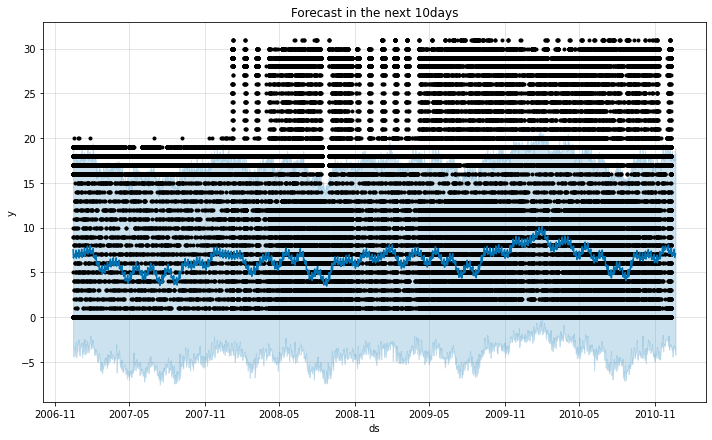

In [ ]:
model.plot(forecast_3)
plt.title('Forecast in the next 10days')
plt.show()

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,6.054862,-2.764818,17.642097,6.054862,6.054862,1.460837,1.460837,1.460837,0.497674,0.497674,0.497674,0.963163,0.963163,0.963163,0.0,0.0,0.0,7.515699
1,2006-12-17,6.045212,-4.898850,18.001565,6.045212,6.045212,0.541754,0.541754,0.541754,-0.412923,-0.412923,-0.412923,0.954678,0.954678,0.954678,0.0,0.0,0.0,6.586967
2,2006-12-18,6.035563,-3.112255,17.994928,6.035563,6.035563,0.842367,0.842367,0.842367,-0.108301,-0.108301,-0.108301,0.950668,0.950668,0.950668,0.0,0.0,0.0,6.877930
3,2006-12-19,6.025914,-3.280076,17.198958,6.025914,6.025914,0.924563,0.924563,0.924563,-0.026279,-0.026279,-0.026279,0.950841,0.950841,0.950841,0.0,0.0,0.0,6.950477
4,2006-12-20,6.016265,-2.792558,17.442046,6.016265,6.016265,0.956667,0.956667,0.956667,0.001853,0.001853,0.001853,0.954814,0.954814,0.954814,0.0,0.0,0.0,6.972932


<Figure size 720x576 with 0 Axes>

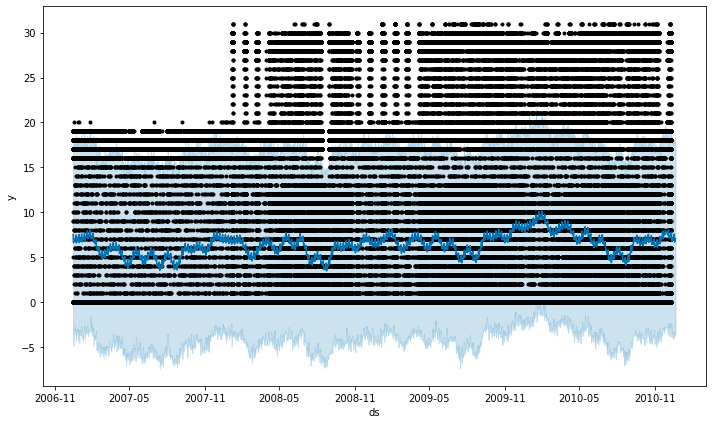

In [ ]:
plt.figure(figsize=(10,8))
model.plot(forecast)
plt.grid()
plt.show()

In [ ]:
#calculate the mae between the actual and predicted value for December
y_true = df['y'][-12:].values

In [ ]:
y_preds = forecast['yhat'][-12:].values
mae = mean_absolute_error(y_true,y_preds)

In [ ]:
mae

7.158792599341091

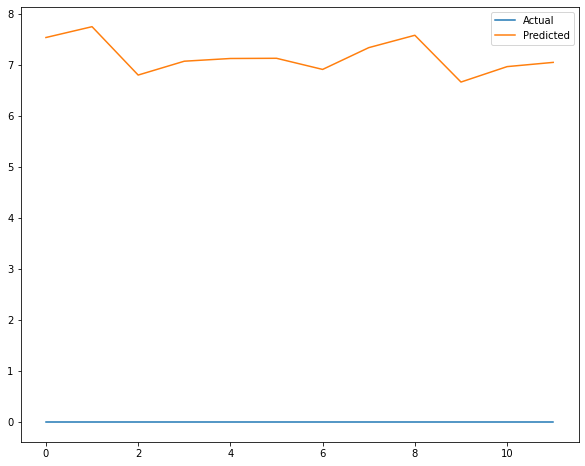

In [ ]:
plt.figure(figsize=(10,8))
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_preds, label="Predicted")
pyplot.legend()
pyplot.show()